## Lesson 10 - Statistics Packages

In this lesson we'll consider some of the various statistics tools available in Python. Many packages provide statistical support: Pandas, Numpy, Scipy, and Scikit-learn.

### Readings

* [Handbook of Biological Statistics](http://www.biostathandbook.com)

### Table of Contents

* [Basic statistics](#Basic-statistics)
* [Regression analysis](#Regression-analysis)
* [Correlation analysis](#Correlation-analysis)
* [Outlier detection](#Outlier-detection)
* [Tests of independence (of two nominal variables)](#Tests-of-independence-(of-two-nominal-variables))

You will probably have to install `scikit-learn` (`sklearn`) before proceeding:

```
pip install scikit_learn
```

In [1]:
%pip install scikit_learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import required packages
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set up pandas and seaborn environments
pd.set_option("display.max_rows", 40)
sns.set()
sns.set_context("notebook")
sns.set_palette("colorblind")

%matplotlib inline

### Basic statistics

#### Basic statistics with Pandas

Pandas provides several methods for computing descriptive statistics and other related operations on Series, DataFrame, and Panel objects. Most of these are aggregations (hence producing a lower-dimensional result) like `sum()`, `mean()`, and `quantile()`, but some of them, like `cumsum()` and `cumprod()`, produce an object of the same size. Generally speaking, these methods take an axis argument:

* Series: no axis argument needed
* DataFrame: “index” (axis=0, default), “columns” (axis=1)
* Panel: “items” (axis=0), “major” (axis=1, default), “minor” (axis=2)

Function | Description
--------- | ----------
count | Number of non-null observations
sum | Sum of values
mean | Mean of values
mad | Mean absolute deviation
median | Arithmetic median of values
min | Minimum
max | Maximum
mode | Mode
abs | Absolute Value
prod | Product of values
std | Bessel-corrected sample standard deviation
var | Unbiased variance
sem | Standard error of the mean
skew | Sample skewness (3rd moment)
kurt | Sample kurtosis (4th moment)
quantile | Sample quantile (value at %)
cumsum | Cumulative sum
cumprod | Cumulative product
cummax | Cumulative maximum
cummin | Cumulative minimum

#### Example: Monthly temperature in Zugspitze from 1950 to 2025

This data has been downloaded and processed from the [Deutscher Wetterdienst](https://www.dwd.de/DE/wetter/wetterundklima_vorort/bayern/zugspitze/_node.html) open dataset ([search and download link](https://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivtagmonat.html)). If you want to pre-process the data yourself, I have chosen the daily data and the station ID `5792` (Zugspitze). The main mappings are the following:

- `MESS_DATUM`: Measurement Date
- `RSK`: Daily rainfall (mm)
- `SDK`: Sunshine duration daily total (hours)
- `SHK_TAG`: Snow depth daily value (cm)
- `PM`: Daily mean air pressure (hPa)
- `UPM`: Daily mean relative humidity (%)
- `TMK`: Daily average temperature (C)
- `TNK`: Daily minimum air temperature at 2m height (C)
- `TXK`: Daily maximum air temperature at 2m height (C)

**Advice:** Any value set at `-999` is a missing measurement.

Let's import data with dates parsed:

In [4]:
df_raw = pd.read_csv("../data/zugspitze_klima_tag_19500101_20241231_05792.txt", parse_dates=["Measurement Date"])
df_raw.head()

,Measurement Date,Daily rainfall (mm),Sunshine duration daily total (hours),Snow depth daily value (cm),Daily mean air pressure (hPa),Daily average temperature (C),Daily mean relative humidity (%),Daily maximum air temperature at 2m height (C),Daily minimum air temperature at 2m height (C)
0,1950-01-01,0.0,8.0,190.0,709.5,-9.4,24.0,-7.9,-10.6
1,1950-01-02,7.0,1.2,180.0,707.0,-9.6,77.0,-7.4,-10.6
2,1950-01-03,16.1,0.0,200.0,695.8,-13.6,96.0,-9.0,-15.0
3,1950-01-04,38.0,0.0,220.0,693.5,-14.9,95.0,-14.7,-15.0
4,1950-01-05,8.5,0.2,270.0,696.9,-11.6,96.0,-10.8,-15.0


We can see that the dataframe has thousands of rows, but only one daily measurement:

In [5]:
df_raw.shape

(27394, 9)

In [6]:
df_raw["Measurement Date"].value_counts()

Measurement Date
1950-01-01    1
2000-01-10    1
2000-01-08    1
2000-01-07    1
2000-01-06    1
             ..
1974-12-29    1
1974-12-28    1
1974-12-27    1
1974-12-26    1
2024-12-31    1
Name: count, Length: 27394, dtype: int64

Let's use grouping from the last last class to calculate the average temperature per year. Here, we use a custom function called [`Grouper`](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) since our group is not a single value, but a time bucket.

We also create a column called "YEAR" extracting the year from the "Measurement Date" as an integer:

In [7]:
df = df_raw.set_index("Measurement Date")
df = df.groupby(pd.Grouper(freq="YE")).mean()
df["YEAR"] = [x.year for x in df.index]
df.reset_index(inplace=True)

Examining the resulting DataFrame we see the groups by year:

In [8]:
df.head(10)

,Measurement Date,Daily rainfall (mm),Sunshine duration daily total (hours),Snow depth daily value (cm),Daily mean air pressure (hPa),Daily average temperature (C),Daily mean relative humidity (%),Daily maximum air temperature at 2m height (C),Daily minimum air temperature at 2m height (C),YEAR
0,1950-12-31,4.484110,5.301370,179.526027,706.919178,-4.093151,79.523288,-1.632055,-6.326027,1950
1,1951-12-31,5.119726,5.162192,235.010959,706.248493,-3.977534,78.358904,-1.429041,-6.186575,1951
2,1952-12-31,6.534153,4.333607,252.273224,705.632240,-5.319945,81.357923,-2.965574,-7.578962,1952
3,1953-12-31,4.250959,5.816164,168.301370,709.376438,-3.646027,74.509589,-1.103562,-5.797534,1953
4,1954-12-31,6.810685,4.478904,210.189041,705.702740,-5.154247,79.756164,-2.398630,-7.574521,1954
5,1955-12-31,6.026575,4.597534,251.832877,705.947671,-5.229589,81.443836,-2.625205,-7.492603,1955
6,1956-12-31,5.281694,5.168306,290.945355,706.196175,-5.824590,80.464481,-3.239617,-8.054918,1956
7,1957-12-31,4.387397,5.163836,172.600000,705.913151,-4.115890,78.361644,-1.721644,-6.276164,1957
8,1958-12-31,5.382192,5.179726,211.846575,703.952329,-4.299178,79.956164,-1.815342,-6.664110,1958
9,1959-12-31,4.464110,5.580822,127.372603,705.510137,-3.634247,75.452055,-0.893973,-5.798904,1959


We can visualize the data using a plot. We have seen that recently events like the [Collapse of the Eiskapelle near the Watzmann](https://www.br.de/nachrichten/bayern/eiskapelle-nach-dem-einsturz-forscher-vermessen-ueberreste,V00aYBH) have been linked to a general rise in temperature. 

Let's look at the yearly average temperature for the Zugspitze to see if we see this behavior:

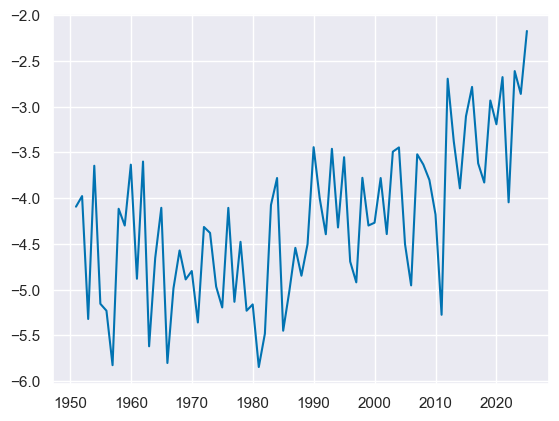

In [9]:
plt.plot(df["Measurement Date"], df["Daily average temperature (C)"]);

If our data is ordered and our index is sequential, we can also plot against the index to visualize the shape of the timeseries:

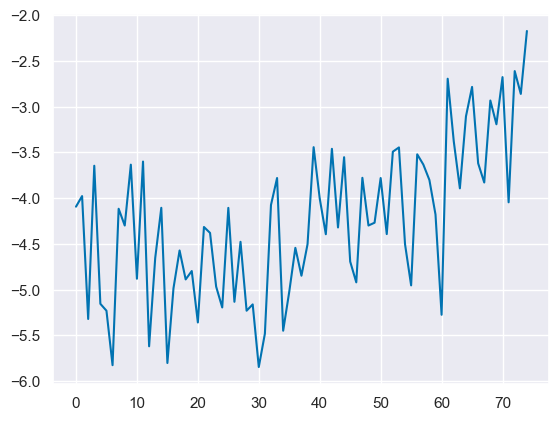

In [10]:
plt.plot(df["Daily average temperature (C)"]);

The method `describe()` will give us generic basic statistics for our whole dataset.

In [11]:
df.describe()

,Measurement Date,Daily rainfall (mm),Sunshine duration daily total (hours),Snow depth daily value (cm),Daily mean air pressure (hPa),Daily average temperature (C),Daily mean relative humidity (%),Daily maximum air temperature at 2m height (C),Daily minimum air temperature at 2m height (C),YEAR
count,75,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,1987-12-31 08:57:36,5.557061,5.130369,196.021456,706.478370,-4.252988,79.688635,-1.490660,-6.662369,1987.000000
min,1950-12-31 00:00:00,4.041096,4.181644,104.454795,702.233973,-5.844536,71.621918,-3.250411,-8.282787,1950.000000
25%,1969-07-01 12:00:00,5.051488,4.850137,158.094521,705.243562,-4.936411,78.335616,-2.219443,-7.232976,1968.500000
50%,1987-12-31 00:00:00,5.396986,5.162192,188.674863,706.602466,-4.298904,79.756164,-1.493151,-6.655890,1987.000000
75%,2006-07-01 12:00:00,6.126708,5.411644,222.882192,708.043151,-3.633425,81.266633,-0.851609,-6.141859,2005.500000
max,2024-12-31 00:00:00,7.464110,6.144658,355.816438,710.280822,-2.174317,86.454795,0.551639,-4.605191,2024.000000
std,NaN,0.840904,0.416793,52.846065,1.981029,0.850610,2.879043,0.908206,0.811752,21.794495


But it is often more useful to look at those statistics individually.

The [mean](https://en.wikipedia.org/wiki/Mean) represents the average of all values in the dataset:

In [12]:
temperature = df["Daily average temperature (C)"]

In [13]:
# mean
temperature.mean()

np.float64(-4.2529883174888345)

The [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) is a measure of the amount of variation of the values of a variable about its mean:

In [14]:
# standard deviation
temperature.std()

np.float64(0.8506102133458082)

The [quantiles](https://en.wikipedia.org/wiki/Quantile) represent the cut points dividing the measurements into different groups

The first quantile or the 25% quantile represents the value at which approximately 1/4 of the values are less than the value of the first quartile (when ordered from least to greatest values).

In [15]:
# quantiles
temperature.quantile(0.25), temperature.quantile(0.5), temperature.quantile(0.75)

(np.float64(-4.936411033760012),
 np.float64(-4.298904109589041),
 np.float64(-3.6334246575342464))

You can get both the `min()` and `max()` values, as well as the position (according to the index) of that value in the original dataset.

This index can be useful to later extract the row where the value came from:

In [16]:
# min and idxmin
temperature.min(), temperature.idxmin()

(np.float64(-5.8445355191256825), 30)

In [17]:
# max (with rounding) and idxmax
temperature.max(), temperature.max().round(1), temperature.idxmax()

(np.float64(-2.1743169398907103), np.float64(-2.2), 74)

In [18]:
# calculate the year with the lowest recorded average temperature
df.loc[temperature.idxmin()]["YEAR"]

np.int64(1980)

The `cumsum()` or cummulative sum is useful to evaluate metrics that stack across consecutive measurements. As an example, the "Daily rainfall (mm)" can be accumulated over the years:

In [19]:
# cumulative sum, in meters
df_raw["Daily rainfall (mm)"].cumsum() / 1000

0          0.0000
1          0.0070
2          0.0231
3          0.0611
4          0.0696
           ...   
27389    152.2200
27390    152.2200
27391    152.2200
27392    152.2200
27393    152.2200
Name: Daily rainfall (mm), Length: 27394, dtype: float64

Counting values can also be used to bucket float values together after rounding:

In [20]:
# value_counts
df.round()["Daily average temperature (C)"].value_counts()

Daily average temperature (C)
-4.0    31
-5.0    26
-3.0    13
-6.0     4
-2.0     1
Name: count, dtype: int64

Have you ever been in a mountain and weather seems not to go your way? Everywhere is foggy and the sun seems to have disappeared.

The data proves this happens quite often:

In [21]:
sunshine_counts = df_raw["Sunshine duration daily total (hours)"].round().value_counts().sort_index()
sunshine_proportion = sunshine_counts / sunshine_counts.sum() * 100
sunshine_proportion.round(1)

Sunshine duration daily total (hours)
0.0     24.7
1.0      7.1
2.0      6.7
3.0      4.7
4.0      5.7
5.0      4.6
6.0      5.8
7.0      5.1
8.0      8.5
9.0      7.1
10.0     6.9
11.0     4.8
12.0     3.8
13.0     2.1
14.0     1.5
15.0     0.6
16.0     0.2
Name: count, dtype: float64

### Regression analysis

[Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis) consists of estimating how variables correlate, through a model. By understand how a system behaves, you can try to predict and forecast what future behaviour will look like.

#### Regression with Seaborn

The most common form of regression is the linear regression, that tries to fit a linear function with parameters to minimize the error function to all the points in your dataset:

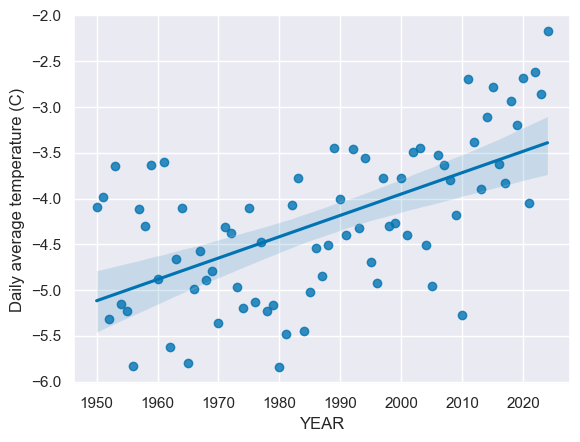

In [22]:
# regression with order=1 (linear)
sns.regplot(x="YEAR", y="Daily average temperature (C)", data=df, order=1);

Sometimes, a simple linear function might not be able to capture the full behavior of your system, but you are able to increase the order to try and achieve a better fit:

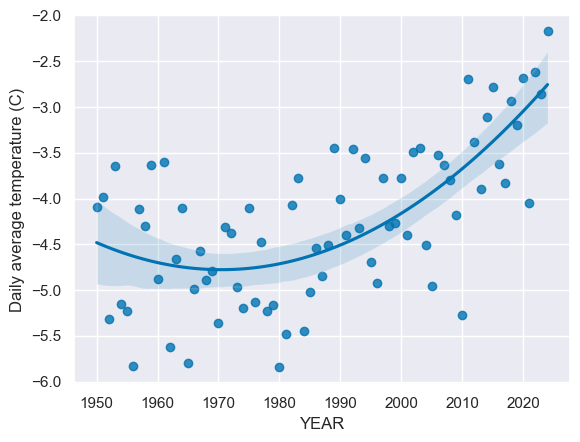

In [23]:
# regression with order=2 (parabolic)
sns.regplot(x="YEAR", y="Daily average temperature (C)", data=df, order=2);

Seaborn is handy to generate plots, but it doesn't provide easy access to the coefficients. For more control, we can use Numpy, Scipy, and other statistics packages.

#### Regression with Numpy

For numpy, [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html) will fit a polynomial $p(x) = p_0 + p_1 x^1 + ... + p_n x^n$ of degree deg to points `(x, y)`. Returns a vector of coefficients `p` that minimises the squared error.

We can evalaluate the polynomial afterward using the formula, or passing it to the [polyval](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyval.html) function.

In [24]:
from numpy.polynomial.polynomial import polyfit, polyval

##### polyfit - least squares polynomial fit (1st order)

In [25]:
year = df["YEAR"]

In [26]:
# linear (1st order) with polyfit
b, m = polyfit(year, temperature, 1)
m, b

(np.float64(0.023322153801300545), np.float64(-50.594107920673))

We can calculate the linear function as `mx + b`:

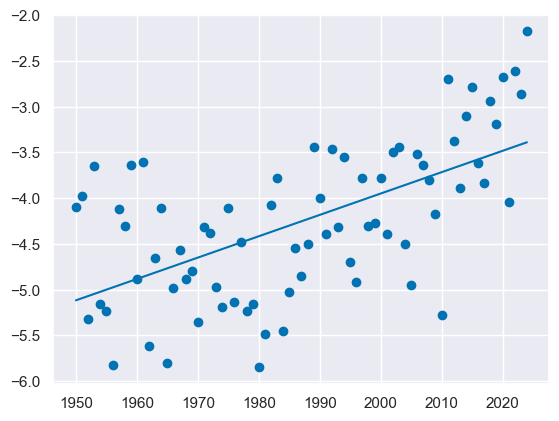

In [27]:
# plot scatter and polyfit
plt.scatter(year, temperature)
plt.plot(year, m * year + b, "-");

##### polyfit - least squares polynomial fit (2nd order)

A second order function might offer a better fit in some cases. If you use the option `full=True`, you can get the squared error in the response:

In [28]:
# parabolic (2nd order) with np.polyfit
p, res_2nd = polyfit(year, temperature, 2, full=True)

In [29]:
# values of p are in decending order
p

array([ 2.73460608e+03, -2.78043309e+00,  7.05524723e-04])

When your dataset is sparse but you have a quadratic function or higher, you will need a finer `x` array than the original. This makes sure your prediction doesn't look choppy. In our case, we have enough points on the `x` array, but you can use `linspace` to create a finely spaced x array with a minimum number of entries:

In [30]:
x1 = np.linspace(1950, 2024)
x1

array([1950.        , 1951.51020408, 1953.02040816, 1954.53061224,
       1956.04081633, 1957.55102041, 1959.06122449, 1960.57142857,
       1962.08163265, 1963.59183673, 1965.10204082, 1966.6122449 ,
       1968.12244898, 1969.63265306, 1971.14285714, 1972.65306122,
       1974.16326531, 1975.67346939, 1977.18367347, 1978.69387755,
       1980.20408163, 1981.71428571, 1983.2244898 , 1984.73469388,
       1986.24489796, 1987.75510204, 1989.26530612, 1990.7755102 ,
       1992.28571429, 1993.79591837, 1995.30612245, 1996.81632653,
       1998.32653061, 1999.83673469, 2001.34693878, 2002.85714286,
       2004.36734694, 2005.87755102, 2007.3877551 , 2008.89795918,
       2010.40816327, 2011.91836735, 2013.42857143, 2014.93877551,
       2016.44897959, 2017.95918367, 2019.46938776, 2020.97959184,
       2022.48979592, 2024.        ])

In [31]:
# calculate the y array for the fit curve using polyval
y1 = polyval(x1, p)
y1

array([-4.48070058, -4.52271626, -4.56151373, -4.59709299, -4.62945406,
       -4.65859692, -4.68452157, -4.70722802, -4.72671627, -4.74298632,
       -4.75603816, -4.7658718 , -4.77248723, -4.77588446, -4.77606349,
       -4.77302431, -4.76676693, -4.75729135, -4.74459756, -4.72868557,
       -4.70955538, -4.68720698, -4.66164038, -4.63285558, -4.60085257,
       -4.56563136, -4.52719194, -4.48553432, -4.4406585 , -4.39256447,
       -4.34125224, -4.28672181, -4.22897317, -4.16800633, -4.10382129,
       -4.03641804, -3.96579659, -3.89195694, -3.81489908, -3.73462302,
       -3.65112875, -3.56441628, -3.47448561, -3.38133673, -3.28496965,
       -3.18538437, -3.08258088, -2.97655919, -2.8673193 , -2.7548612 ])

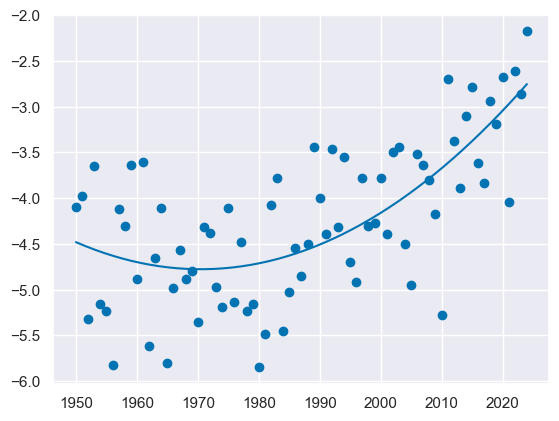

In [32]:
# plot data then curve
plt.scatter(year, temperature)
plt.plot(x1, y1, "-");

##### polyfit - least squares polynomial fit (3rd order)

Having higher and higher polynomial orders might only present marginal gains:

In [33]:
# 3rd order with np.polyfit
p, res_3rd = polyfit(year, temperature, 3, full=True)
p

array([ 3.01428927e+04, -4.41677367e+01,  2.15360486e-02, -3.49446801e-06])

In [34]:
# generate curve with polyval
y1 = polyval(x1, p)

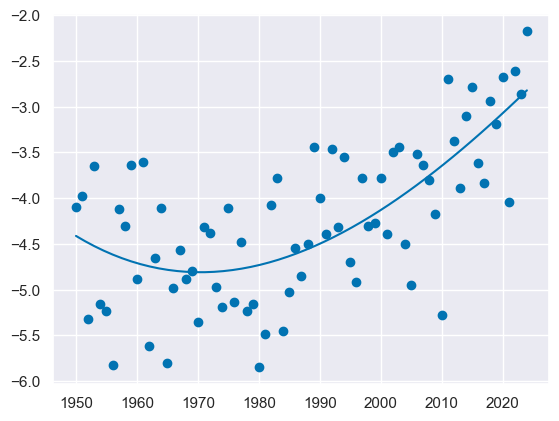

In [35]:
# plot data then curve
plt.scatter(year, temperature)
plt.plot(x1, y1, "-");

We can see that the improvement in residual squared error is very small:

In [36]:
abs((res_2nd[0] - res_3rd[0]) / res_3rd[0] * 100)

array([0.20882208])

#### Fitting time series to a sinusoidal wave

When you want to fit periodical data (i.e. seasonal data for multiple years), you might want to fit a sine wave instead, because it captures the periodicity of the system.

First, a refresher on [sine waves](https://en.wikipedia.org/wiki/Sine_wave). They follow the sine equal and can be configured with 4 different variables: **amplitude**, **frequency**, **phase** and **offset**. 

$$y(t)=A\sin(\omega t+\varphi) + C$$

The period of the sine wave can be calculated as $P = \frac{2 \pi}{f}$.

Here is a preview of what each variable does on the final plot:

In [37]:
# initialize sine wave parameters
def plot_sine_wave(amplitude: float = 0.5, frequency: float = 0.5, phase: float = 0.0, offset: float = 1.0):
    # generate x and y arrays for sine wave
    x1 = np.linspace(0, 24, num=2000)
    y1 = np.sin(x1 * frequency + phase) * amplitude + offset
    # plot sine wave
    fig, ax = plt.subplots()
    ax.plot(x1, y1)
    ax.set_title("Interactive Sine Wave: y = A·sin(f·x + φ) + C", fontweight="bold")
    ax.set_xticks([2 * np.pi, 4 * np.pi, 6 * np.pi])
    ax.set_xticklabels(["2$\\pi$", "4$\\pi$", "6$\\pi$"])
    ax.set_ylim([-2, 2])
    ax.set_xlim([0, 8 * np.pi])

    # Add text annotations showing current parameter values
    textstr = "\n".join(
        (
            f"Amplitude (A) = {amplitude:.2f}",
            f"Frequency (f) = {frequency:.2f}",
            f"Phase (φ) = {phase:.2f}",
            f"Offset (C) = {offset:.2f}",
        )
    )

    # Place text box in upper left
    props = dict(boxstyle="round", facecolor="wheat", alpha=0.8)
    ax.text(0.02, 0.97, textstr, transform=ax.transAxes, fontsize=11, verticalalignment="top", bbox=props)
    plt.tight_layout()
    plt.show()


from ipywidgets import interact, FloatSlider, Layout

interact(
    plot_sine_wave,
    amplitude=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description="Amplitude (A):"),
    frequency=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description="Frequency (f):"),
    phase=FloatSlider(min=-np.round(np.pi), max=np.round(np.pi), step=0.1, value=0, description="Phase (φ):"),
    offset=FloatSlider(min=-1.6, max=1.6, step=0.1, value=0.0, description="Offset (C):"),
);

interactive(children=(FloatSlider(value=1.0, description='Amplitude (A):', max=2.0, min=0.1), FloatSlider(valu…

We are now going to regroup our dataset into montly samples for a more detailed view of our data. We are instead going to select the last 10 years for a more easy to visualize dataset.

Let's calculate average temperature per year:

In [38]:
df_monthly = df_raw[df_raw["Measurement Date"] > np.datetime64("2015-01-01")]
df_monthly.set_index("Measurement Date", inplace=True)
df_monthly = df_monthly.groupby(pd.Grouper(freq="ME")).mean()
df_monthly.reset_index(inplace=True)

we are going to use the numerical index for our "t" variable. Make sure our index is sequential (January 2015 is zero):

In [39]:
df_monthly.sort_index(inplace=True)
df_monthly.head(n=12)

,Measurement Date,Daily rainfall (mm),Sunshine duration daily total (hours),Snow depth daily value (cm),Daily mean air pressure (hPa),Daily average temperature (C),Daily mean relative humidity (%),Daily maximum air temperature at 2m height (C),Daily minimum air temperature at 2m height (C)
0,2015-01-31,6.720000,3.393333,249.233333,701.880000,-10.940000,77.533333,-7.713333,-13.606667
1,2015-02-28,2.807143,6.082143,315.000000,700.535714,-10.764286,64.285714,-7.560714,-13.167857
2,2015-03-31,5.764516,5.838710,347.419355,705.877419,-8.509677,72.193548,-5.712903,-11.345161
3,2015-04-30,5.210000,7.416667,444.433333,708.533333,-6.703333,73.166667,-3.766667,-9.536667
4,2015-05-31,10.129032,4.070968,423.483871,709.922581,-1.725806,88.225806,0.645161,-4.080645
5,2015-06-30,5.573333,5.623333,314.333333,714.920000,2.146667,88.000000,5.050000,-0.490000
6,2015-07-31,3.416129,7.083871,125.903226,716.880645,6.493548,81.000000,9.874194,3.177419
7,2015-08-31,4.716129,6.370968,0.096774,716.216129,6.009677,82.032258,8.800000,3.625806
8,2015-09-30,4.580000,5.250000,7.533333,711.070000,-0.866667,84.733333,2.040000,-3.590000
9,2015-10-31,2.583871,6.029032,21.967742,709.396774,-2.129032,76.290323,0.483871,-4.600000


In [40]:
# store our values as new variables
index_monthly = df_monthly.index
temperature_monthly = df_monthly["Daily average temperature (C)"]

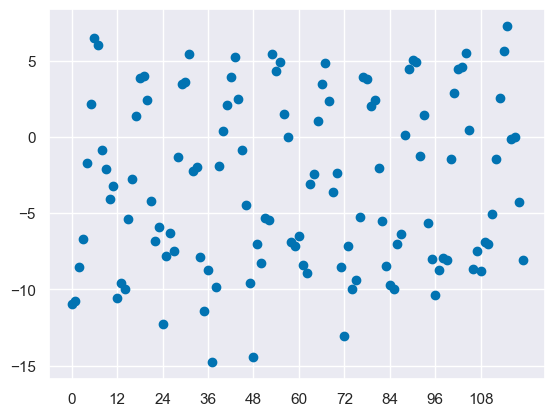

In [41]:
# we change the ticks to show every year (12 months)
plt.scatter(index_monthly, temperature_monthly)
plt.xticks(np.arange(0, df_monthly.index.max(), 12));

An optimization algorithm will take an arbritrary function, and try to find a local maximum by changing the coeficients in order to minimize and error function.

We first need to guess the sine wave properties - they are a starting point for my optimization attempt. Afterward, we can pass our custom function to [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html):

In [42]:
# guess the sine wave properties
guess_period = 12
guess_freq = (2 * np.pi) / guess_period
guess_phase = 0
guess_amplitude = 10
guess_offset = -5

p0 = np.array([guess_freq, guess_amplitude, guess_phase, guess_offset])

In [43]:
# create a function that returns the curve to fit our data to
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

In [44]:
# now fit the curve to the data using scipy.optimize.curve_fit
fit = scipy.optimize.curve_fit(my_sin, index_monthly, temperature_monthly, p0=p0)

In [45]:
# compare the guessed values...
p0

array([ 0.52359878, 10.        ,  0.        , -5.        ])

In [46]:
# ...with the fit values
fit[0]

array([ 0.52330858,  7.41339935, -1.8141294 , -3.10942409])

In [47]:
We can pass our new coeficients (along with the first guess) to our custom function 

SyntaxError: invalid syntax (1062430282.py, line 1)

In [ ]:
# we'll use this to plot our first estimate
data_first_guess = my_sin(index_monthly, *p0)

In [ ]:
# recreate the fitted curve using the optimized parameters
data_fit = my_sin(index_monthly, *fit[0])

Checking the results in a plot:

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.plot(temperature_monthly, ".")
ax1.plot(data_first_guess)
ax1.set_title("First guess")
ax2.plot(temperature_monthly, ".")
ax2.plot(data_fit)
ax2.set_title("After fitting")
# we use setp
plt.setp((ax1, ax2), xticks=np.arange(0, index_monthly.max(), 12));

### Correlation Analysis

[Correlation](https://en.wikipedia.org/wiki/Correlation) is a statistical relationship between two variables. This usually mean _linear_ relationship between the two variables:

Very important to notice that **correlation does not imply causation**:

<center>
<img src="../images/Correlation_verses_causation_demonstration_chart.png" width="40%"/>
</center>

#### Example: Correlation analysis with World dataset

I retrieved some country metrics from the world dataset ([_Global Country Information Dataset 2023_, Nidula Elgiriyewithana, available at Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)).

In [ ]:
df_world_raw = pd.read_csv("../data/world-data-2023.csv", thousands=",")
df_world_raw.columns

In [ ]:
df_world = df_world_raw[["Country", "Life expectancy", "Total tax rate", "GDP", "Population", "Co2-Emissions"]]
df_world = df_world.dropna()
df_world["GDP"] = df_world["GDP"].str.replace("$", "").str.replace(",", "").astype(int)
df_world["Total tax rate"] = df_world["Total tax rate"].str.replace("%", "").astype(float)
df_world["GPD (per capita)"] = df_world["GDP"] / df_world["Population"]
df_world

##### Pearson correlation

[Pearson's correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) coefficient is the covariance of the two variables divided by the product of their standard deviations.

The evaluation returns a value between -1 and 1, with 0 implying no correlation. A negative correlation will imply that as x increases, y decreases.

In [ ]:
# learn more about pearsonr (values correlation)
?scipy.stats.pearsonr

In [ ]:
# pearson correlation (linear regression on values) of GDP (per capita) and Total tax rate
scipy.stats.pearsonr(df_world["GPD (per capita)"], df_world["Total tax rate"])

In [ ]:
# pearson correlation (linear regression on values) of GDP (per capita) and Life expectancy
scipy.stats.pearsonr(df_world["GPD (per capita)"], df_world["Life expectancy"])

In [ ]:
# pearson correlation (linear regression on values) of GDP and Co2-Emissions
scipy.stats.pearsonr(df_world["GDP"], df_world["Co2-Emissions"])

##### Spearman correlation

[Spearman correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) is defined as the Pearson correlation coefficient between the rank variables. It could be used in a situation where you only have ranked data.

It returns values between -1 and 1 similar to the Pearson's correlation.

In [ ]:
?scipy.stats.spearmanr

In [ ]:
# spearman correlation of GDP (per capita) and Total tax rate
scipy.stats.spearmanr(df_world["GPD (per capita)"], df_world["Total tax rate"])

In [ ]:
# spearman correlation of GDP (per capita) and Life expectancy
scipy.stats.spearmanr(df_world["GPD (per capita)"], df_world["Life expectancy"])

In [ ]:
# spearman correlation of GDP and Co2-Emissions
scipy.stats.spearmanr(df_world["GDP"], df_world["Co2-Emissions"])

Let's plot the linear regressions and try to visualize the relationships:

In [ ]:
# plot linear regressions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(x="GPD (per capita)", y="Total tax rate", data=df_world, ax=ax1)
sns.regplot(x="GPD (per capita)", y="Life expectancy", data=df_world, ax=ax2)
sns.regplot(x="GDP", y="Co2-Emissions", data=df_world, ax=ax3);

It looks great, but it seems like there are a couple of exceptions (called outliers) in our dataset, especifically on the "Total tax rate" one. We can dig deeper on that one with outlier detection.

### Outlier detection

#### Z-Score test for outliers

A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution.

Many statistical tests can be conveniently performed as approximate Z-tests if the sample size is large or the population variance is known.

If the population variance is unknown (and therefore has to be estimated from the sample itself) and the sample size is not large (n < 30), the Student's t-test may be more appropriate (in some cases, n < 50).

<center>
<img src="../images/Z-score.png" width="40%"/>
</center>

Let's first test if any of the values fall in a normal distribution:

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
scipy.stats.probplot(df_world["Total tax rate"], dist="norm", plot=ax1)
scipy.stats.probplot(df_world["Life expectancy"], dist="norm", plot=ax2)
scipy.stats.probplot(df_world["Co2-Emissions"], dist="norm", plot=ax3);

Seems like the best normal distribution is the "Total tax rate", although not really a perfect match.

We will use Z-Score to figure out which elements are the outlier from this dataset. 

From out figure above, we can consider the 99% percentile, or the value of 2.576:

In [ ]:
tax_rate = df_world[["Country", "Total tax rate", "GPD (per capita)"]].copy()
tax_rate["Z-Score"] = scipy.stats.zscore(df_world["Total tax rate"])
outliers = tax_rate[(tax_rate["Z-Score"] > 2.576) | (tax_rate["Z-Score"] < -2.576)]
outliers

For reference, the dataset defines the "Total tax rate" as _Overall tax burden as a percentage of commercial profits_.

We can remove those outliers and plot the different result:

In [ ]:
non_outlier = tax_rate[(tax_rate["Z-Score"] <= 2.576) & (tax_rate["Z-Score"] >= -2.576)]
sns.regplot(x="GPD (per capita)", y="Total tax rate", data=non_outlier);

As we can see from the plot, even when we remove the outliers, there seems to be not that much correlation between the two values, as proven in our previous Pearson and Spearman correlation tests.

#### Clustering for outlier detection

We can also train our own algorithms for outlier detection for more complex scenarios. Those algorithms will try to fit on the given data, and can also be adjusted for a custom fit. Here are a couple of examples from the [official Scipy documentation for Novelty and Outlier detection](https://scikit-learn.org/stable/modules/outlier_detection.html):

<center>
<img src="../images/Scikit-outlier-methods.png" width="50%"/>
</center>

We are going to try and cluster our "Co2 Emissions" vs "GDP" plot, because there seems to be a cluster with just a couple of outliers, and we want to figure out who they are:

In [ ]:
X = df_world[["GDP", "Co2-Emissions"]].values
# we have to scale the data for the method
X_scaled = sklearn.preprocessing.MinMaxScaler().fit_transform(X)
# Then fit our model - here, you should adjust nu and gamma to obtain better result
model = sklearn.svm.OneClassSVM(nu=0.05, gamma=0.1)
model.fit(X_scaled)
X_predicted = model.predict(X_scaled)
# we then try to plot the results
df_world["Prediction"] = X_predicted
sns.scatterplot(df_world, x="GDP", y="Co2-Emissions", hue="Prediction")
df_world[df_world["Prediction"] == -1][["Country", "GDP", "Co2-Emissions"]]

In [ ]:
# and the plot of only the entries that are inliers
sns.scatterplot(df_world[df_world["Prediction"] == 1], x="GDP", y="Co2-Emissions");

#### Fisher's exact test

Use the Fisher's exact test of independence when you have two nominal variables and you want to see whether the proportions of one variable are different depending on the value of the other variable. Use it when the sample size is small.

Parameters
* table: array_like of ints.
    A 2x2 contingency table.  Elements should be non-negative integers.
* alternative: {'two-sided', 'less', 'greater'}, optional.
    Which alternative hypothesis to the null hypothesis the test uses.
    Default is 'two-sided'.

Returns
* oddsratio: float.
    The odds ratio in the form "unconditional Maximum Likelihood Estimate". This is a prior odds ratio and not a posterior estimate.
* p_value: float.
    p-value, the probability of obtaining a distribution at least as
    extreme as the one that was actually observed, assuming that the
    null hypothesis is true.

Say we spend a few days counting whales and sharks in the Atlantic and
Indian oceans. In the Atlantic ocean we find 8 whales and 1 shark, in the
Indian ocean 2 whales and 5 sharks. Then our contingency table is:

In [ ]:
f = pd.DataFrame([[8, 2], [1, 5]], index=["Atlantic", "Indian"], columns=["whales", "sharks"])
f

We use this table to find the p-value:

In [ ]:
odds_ratio, p_value = scipy.stats.fisher_exact(f, alternative="two-sided")
odds_ratio, p_value

The probability that we would observe this or an even more imbalanced ratio
by chance is about 3.5%.  A commonly used significance level is 5%--if we
adopt that, we can therefore conclude that our observed imbalance is
statistically significant; whales prefer the Atlantic while sharks prefer
the Indian Ocean.

For tables with large numbers, the (inexact) chi-square test implemented
in the function `chi2_contingency` can also be used.

#### Chi-square test of independence

Use the chi-square test of independence when you have two nominal variables and you want to see whether the proportions of one variable are different for different values of the other variable. Use it when the sample size is large.

Parameters:
* observed: array_like.
    The contingency table. The table contains the observed frequencies
    (i.e., number of occurrences) in each category.  In the two-dimensional
    case, the table is often described as an "R x C table".

Returns:

* chi2: float.
    The test statistic.
* p: float.
    The p-value of the test
* dof: int.
    Degrees of freedom
* expected: ndarray, same shape as `observed`.
    The expected frequencies, based on the marginal sums of the table.

In [ ]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(f)
chi2, p, dof, expected